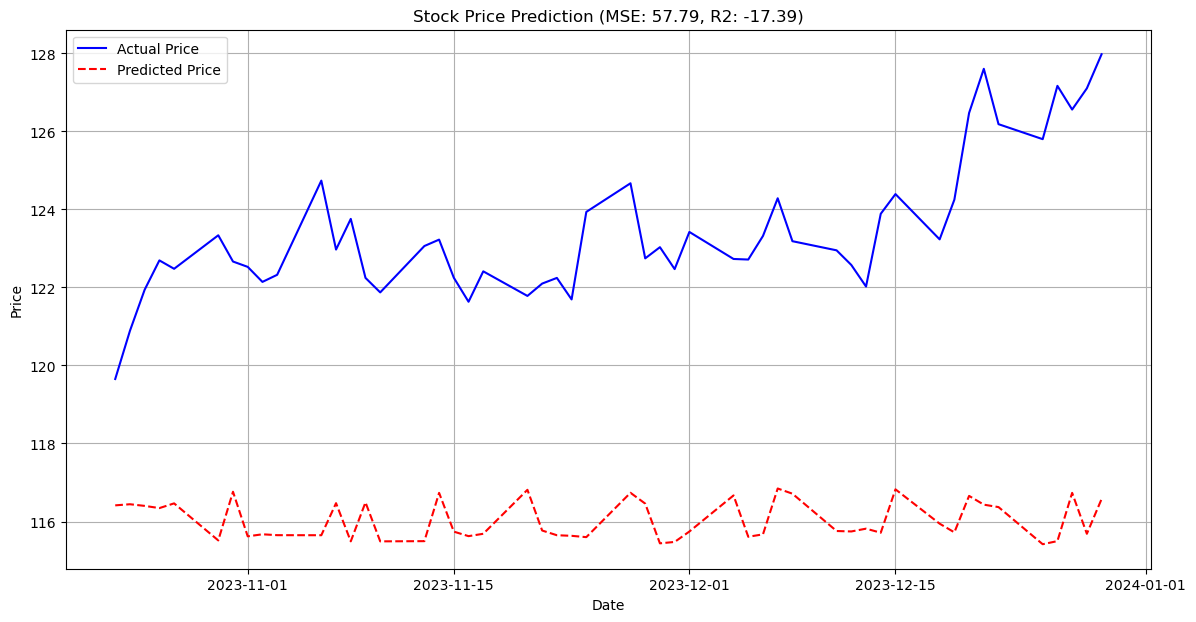

57.78604426641801 -17.390382637490074


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 가상의 주가 데이터 생성
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="B")  # 영업일 기준
n = len(dates)

# 랜덤한 주가 생성 (트렌드 + 노이즈)
prices = np.cumsum(np.random.normal(loc=0.1, scale=1, size=n)) + 100

# 데이터프레임 구성
df = pd.DataFrame({"Date": dates, "Price": prices})
df.set_index("Date", inplace=True)

# 피처 생성 (이동평균, 변동폭 등)
df["SMA_5"] = df["Price"].rolling(window=5).mean()
df["SMA_10"] = df["Price"].rolling(window=10).mean()
df["Daily_Change"] = df["Price"].diff()
df["Volatility"] = df["Price"].rolling(window=5).std()

# 결측값 제거 (이동평균 계산으로 인한)
df.dropna(inplace=True)

# 입력(X)과 출력(y) 설정: 다음날 주가를 예측
X = df[["Price", "SMA_5", "SMA_10", "Daily_Change", "Volatility"]]
y = df["Price"].shift(-1).dropna()
X = X[:-1]  # y에 맞춰 X도 동일하게 자름

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 랜덤포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label="Actual Price", color="blue")
plt.plot(df.index[-len(y_test):], y_pred, label="Predicted Price", color="red", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Stock Price Prediction (MSE: {mse:.2f}, R2: {r2:.2f})")
plt.legend()
plt.grid(True)
plt.show()
print(mse,r2)

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255

# 모델 구성
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),  # 은닉층 1
    layers.Dense(64, activation='relu'),  # 은닉층 2
    layers.Dense(10, activation='softmax')  # 출력층 (10개의 클래스)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# 예측 결과 시각화
predictions = model.predict(x_test)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predictions[i].argmax()}')
    plt.axis('off')
plt.show()
